# Evaluation

In [1]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [31]:
EXP = "801_divs_only_elements"
TESTING = False

PATH = f"../results/{EXP}/"

if TESTING:
    PATH = f"../testresults/{EXP}/"

## CLF report

In [32]:
clfreport_svm = pd.read_csv(PATH + f"clfreport__{EXP}_svm.csv", index_col=0)
clfreport_xgb_tree = pd.read_csv(PATH + f"clfreport__{EXP}_xgb_tree.csv", index_col=0)

In [33]:
clfreport_svm.tail(3)

,precision,recall,f1-score,support
accuracy,0.344381,0.344381,0.344381,0.344381
macro avg,0.438170,0.260020,0.307652,7573.000000
weighted avg,0.386749,0.344381,0.323708,7573.000000


In [34]:
clfreport_xgb_tree.tail(3)

,precision,recall,f1-score,support
accuracy,0.323650,0.323650,0.323650,0.32365
macro avg,0.486777,0.218787,0.274358,7573.00000
weighted avg,0.426961,0.323650,0.294170,7573.00000


## Confusion Matrices

In [39]:
cm_svm = pd.read_csv(PATH + f"cm__{EXP}_svm.csv", index_col=0)
cm_xgb_tree = pd.read_csv(PATH + f"cm__{EXP}_xgb_tree.csv", index_col=0)

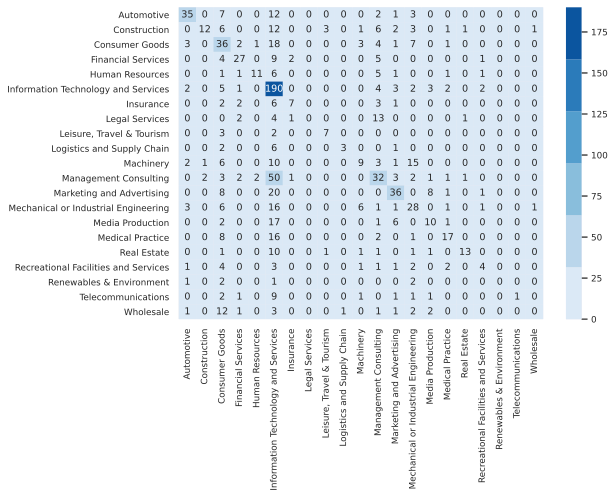

In [40]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.figure(figsize=(9, 7))
sns.set(font_scale=0.8)
sns.heatmap(cm_svm, 
            annot=True, 
            cmap=sns.color_palette("Blues"),
            fmt='g')
plt.title("")
plt.tight_layout()
#plt.savefig("", dpi=300)
plt.show()

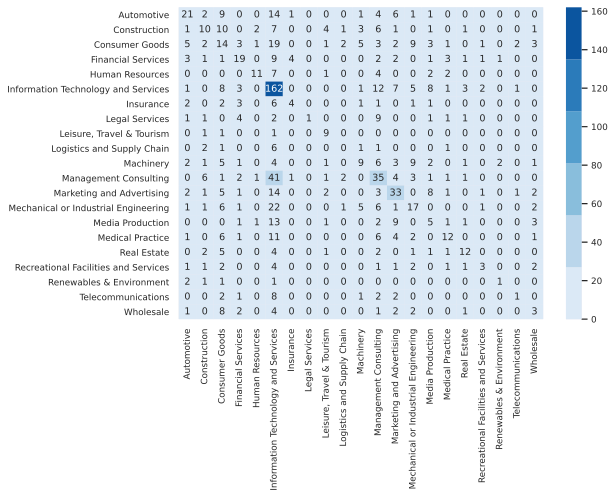

In [41]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.figure(figsize=(9, 7))
sns.set(font_scale=0.8)
sns.heatmap(cm_xgb_tree, 
            annot=True, 
            cmap=sns.color_palette("Blues"),
            fmt='g')
plt.title("")
plt.tight_layout()
#plt.savefig("", dpi=300)
plt.show()

## Coefs & Feature Importance

In [42]:
%%time
# coefs, really big!
#coefs_svm = pd.read_csv(PATH + f"coefs__{EXP}_svm.csv.zip", index_col=0)

# feature importance
coefs_xgb_tree = pd.read_csv(PATH + f"fi__{EXP}_xgb_tree.csv", index_col=0)

CPU times: user 64.8 ms, sys: 93 µs, total: 64.9 ms
Wall time: 62.5 ms


In [26]:
coefs_svm.T.columns

Index(['Automotive', 'Construction', 'Consumer Goods', 'Financial Services',
       'Human Resources', 'Information Technology and Services', 'Insurance',
       'Legal Services', 'Leisure, Travel & Tourism',
       'Logistics and Supply Chain', 'Machinery', 'Management Consulting',
       'Marketing and Advertising', 'Mechanical or Industrial Engineering',
       'Media Production', 'Medical Practice', 'Real Estate',
       'Recreational Facilities and Services', 'Renewables & Environment',
       'Telecommunications', 'Wholesale'],
      dtype='object', name='class')

In [23]:
# svm overall feature importance
coefs_svm.abs().sum().sort_values(ascending=False).head(10)

software      22.837563
it            17.370550
consulting    16.444757
marketing     15.374514
agentur       14.963417
immobilien    14.473487
produkte      14.226936
automotive    14.165377
hotel         13.783960
energy        13.101818
dtype: float64

In [29]:
CLASS = "Automotive"

coefs_svm.T[CLASS].abs().sort_values(ascending=False).head(10)

automotive            4.054991
vehicle               2.754515
car                   2.411623
fahrzeug              2.239449
cars                  2.236066
auto                  2.164586
automobilindustrie    2.138713
vehicles              1.994659
fahrzeuge             1.994090
autohaus              1.960702
Name: Automotive, dtype: float64

In [46]:
coefs_xgb_tree.sort_values(by="value", ascending=False).head(10)

,value
feature,
schaden,0.017495
conosco,0.008740
onlineshop,0.008363
connectivity,0.007976
speed,0.007568
dc,0.006231
baby,0.006104
sortiment,0.006089
recruiter,0.006002
